**Ejercicio 1**. Descargue los datos de las Carpetas de Investigación (acumulado 2016-2024) en el sitio: https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico. Con el parámetro chunksize lea los datos y realice lo siguiente:

* Obtenga un Dataframe con la frecuencia de los delitos en orden descendente y un gráfico que ilustre los primeros 15 delitos con más frecuencia.

* Obtenga un Dataframe con los delitos cometidos por alcaldía y un gráfico que ilustre esto.

* Obtenga un Dataframe con los delitos cometidos por categoría y un gráfico que ilustre esto.

* ¿Cuales son las 5 colonias donde se han registrado más delitos?

* ¿En que hora se registraron más delitos?

* ¿Cuales son las 3 alcaldias que registraron menos delitos?

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [252]:
import pandas as pd
# Reemplaza con la ruta correcta en tu Google Drive
df = pd.read_csv('/content/drive/MyDrive/Datos/carpetasFGJ_acumulado_2025_01.csv')
df.head()

,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,...,fiscalia,agencia,unidad_investigacion,colonia_hecho,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud
0,2016,Enero,2016-01-01,00:00:00,2015.0,Diciembre,2015-12-31,16:30:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,...,INVESTIGACIÓN EN TLALPAN,TLP-4,UI-2CD,JARDINES EN LA MONTAÑA,Jardines En La Montaña,TLALPAN,NaN,CDMX,19.30086,-99.20877
1,2016,Enero,2016-01-01,00:00:00,2015.0,Diciembre,2015-12-31,22:40:00,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,...,INVESTIGACIÓN EN TLALPAN,TLP-1,UI-2CD,LOMAS DE PADIERNA,Lomas De Padierna,TLALPAN,NaN,CDMX,19.29003,-99.21748
2,2016,Enero,2016-01-01,00:00:00,2016.0,Enero,2016-01-01,00:20:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,...,INVESTIGACIÓN EN IZTAPALAPA,IZP-2,UI-2CD,SAN ANTONIO CULHUACÁN,Barrio San Antonio Culhuacan,IZTAPALAPA,NaN,CDMX,19.34080,-99.11431
3,2016,Enero,2016-01-01,00:00:00,2015.0,Diciembre,2015-12-31,22:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,...,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-8,UI-2CD,SAN JUAN DE ARAGÓN II SECCIÓN,San Juan De Aragon Ii Seccion,GUSTAVO A. MADERO,NaN,CDMX,19.45106,-99.08669
4,2016,Enero,2016-01-01,00:00:00,2015.0,Diciembre,2015-12-31,22:30:00,HOMICIDIOS INTENCIONALES (OTROS),HOMICIDIO DOLOSO,...,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-2SD,NATIVITAS,Nativitas,BENITO JUAREZ,NaN,CDMX,19.38095,-99.13982


In [254]:
# Dataframe con la frecuencia de los delitos en orden descendente y un gráfico que ilustre los primeros 15 delitos con más frecuencia.

df_delitos = df['delito'].value_counts().reset_index()
df_delitos.sort_values(by='delito', ascending=False, inplace=True)
df_delitos.columns = ['Delito', 'Frecuencia']
df_delitos

,Delito,Frecuencia
0,VIOLENCIA FAMILIAR,261181
336,VIOLACION Y ROBO DE VEHICULO,2
320,VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,9
224,VIOLACION TUMULTUARIA EQUIPARADA,156
188,VIOLACION TUMULTUARIA,323
...,...,...
11,ABUSO DE CONFIANZA,37902
40,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,10584
75,ABUSO DE AUTORIDAD,4366
129,ABORTO,1240


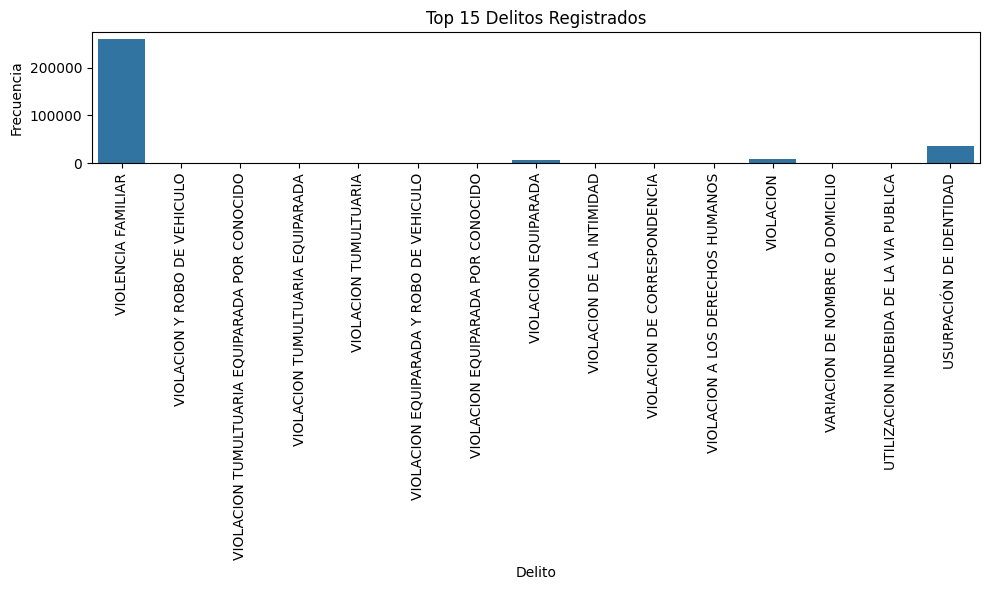

In [255]:
# Grafico de los primeros 15 delitos

plt.figure(figsize=(10, 6))
sns.barplot(x='Delito', y='Frecuencia', data=df_delitos.head(15))
plt.title('Top 15 Delitos Registrados')
plt.xlabel('Delito')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [257]:
# Dataframe con los delitos cometidos por categoría

df_categoria = df.groupby('categoria_delito').size().reset_index(name='Frecuencia')
df_categoria.sort_values(by='Frecuencia', ascending=False, inplace=True)
df_categoria

,categoria_delito,Frecuencia
0,DELITO DE BAJO IMPACTO,1711755
13,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,104401
15,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,90384
2,HECHO NO DELICTIVO,75553
8,ROBO A NEGOCIO CON VIOLENCIA,27993
12,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,16928
17,VIOLACIÓN,16321
11,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,15760
4,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,12249
3,HOMICIDIO DOLOSO,10443


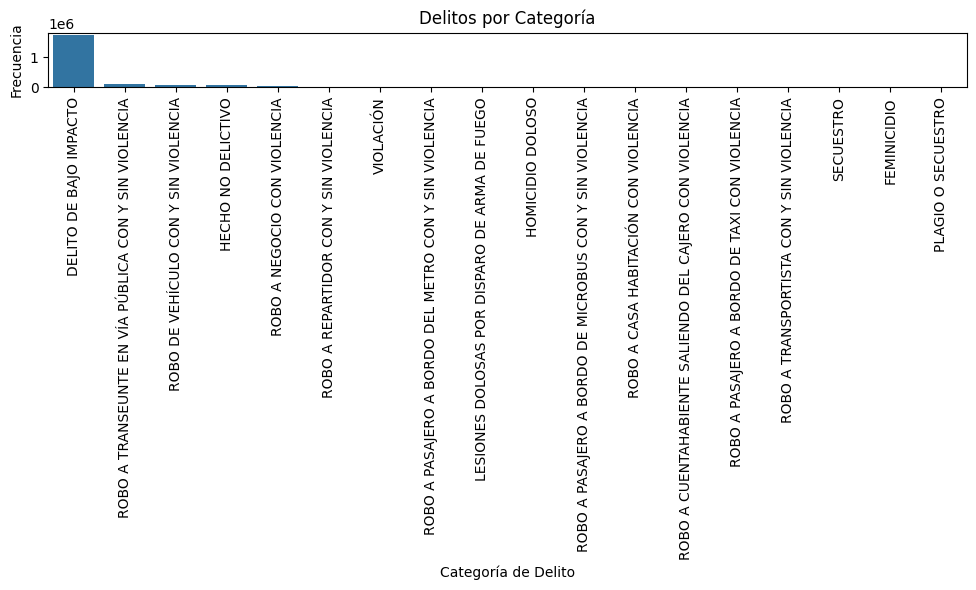

In [258]:
# Grafico

plt.figure(figsize=(10, 6))
sns.barplot(x='categoria_delito', y='Frecuencia', data=df_categoria)
plt.title('Delitos por Categoría')
plt.xlabel('Categoría de Delito')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [260]:
# 5 colonias con mas delitos

df_colonias = df.groupby('alcaldia_hecho').size().reset_index(name='Frecuencia')
df_colonias.sort_values(by='Frecuencia', ascending=False, inplace=True)
df_colonias.head()

,alcaldia_hecho,Frecuencia
6,CUAUHTEMOC,318787
9,IZTAPALAPA,304367
7,GUSTAVO A. MADERO,209034
2,BENITO JUAREZ,164576
4,COYOACAN,142074


In [262]:
# 5 colonias con mas delitos

df_colonias_hecho = df.groupby('colonia_hecho').size().reset_index(name='Frecuencia')
df_colonias_hecho.sort_values(by='Frecuencia', ascending=False, inplace=True)
display(df_colonias_hecho.head())

,colonia_hecho,Frecuencia
325,CENTRO,65086
435,DOCTORES,38978
426,DEL VALLE CENTRO,28178
1251,ROMA NORTE,24209
996,NARVARTE,20080


In [269]:
# Horario con mas delitos

df_hora_hecho = df.groupby('hora_hecho').size().reset_index(name='Frecuencia')
df_hora_hecho.sort_values(by='Frecuencia', ascending=False, inplace=True)
display(df_hora_hecho.head(5))

,hora_hecho,Frecuencia
1431,12:00:00,192234
1191,10:00:00,81609
1311,11:00:00,46664
1071,09:00:00,46116
1791,15:00:00,44576


In [270]:
# 3 alcaldias con menos delitos

df_colonias_menos = df_colonias.sort_values(by='Frecuencia', ascending=True)
display(df_colonias_menos.head(3))

,alcaldia_hecho,Frecuencia
3,CDMX (indeterminada),17586
12,MILPA ALTA,17971
5,CUAJIMALPA DE MORELOS,33282


**Ejercicio 2**. Extraiga las tablas que aparecen en la página web:

https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_M%C3%A9xico

y realice lo siguiente:

* Obtenga un gráfico de la capacidad de los estadios de la liga mx en orden descendente.

* Obtenga un gráfico de los 10 equipos con más títulos en orden ascendente.

* Obtenga un gráfico de directores técnicos con más títulos en orden ascendente.

* De la tabla de directores técnicos con más títulos conteste lo siguiente: ¿Cuantos de estos directores técnicos conquistaron un título con Guadalajara? ¿Cuantos de estos directores técnicos conquistaron un título con América? (Utilice variables dummy).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lxml

In [156]:
# Extraer tablas
url = 'https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_M%C3%A9xico'
tablas = pd.read_html(url)
tablas

[                           Liga MX  \
 0             Torneo Apertura 2025   
 1   Logo oficial de la competición   
 2                  Datos generales   
 3                             Sede   
 4                       Asociación   
 5                        Categoría   
 6                     Inauguración   
 7                          Edición   
 8                 N.º de ediciones   
 9                      Organizador   
 10                    Patrocinador   
 11                      TV oficial   
 12                        Palmarés   
 13                         Campeón   
 14                      Subcampeón   
 15              Datos estadísticos   
 16                   Participantes   
 17                        Partidos   
 18                    Más laureado   
 19                  Más presencias   
 20                        Descenso   
 21                   Copa Nacional   
 22                      Super Copa   
 23                 Clasificación a   
 24                      

In [157]:
len(tablas)

15

In [162]:
tablas[2]

,0,1,2,3,4,5,6
0,Equipos de la temporada 2024-25,Equipos de la temporada 2024-25,Equipos de la temporada 2024-25,Equipos de la temporada 2024-25,Equipos de la temporada 2024-25,Equipos de la temporada 2024-25,Equipos de la temporada 2024-25
1,Equipo,Debut,Presencias,En 1.ª desde,Serie,Estadio,Capacidad
2,Club América,1943-44,112,1943-44,112,Ciudad de los Deportes,36 681
3,Atlas F. C.,1943-44,109,1979-80,75,Jalisco,55 020
4,Atlético de San Luis,2019-20,11,2019-20,11,Alfonso Lastras,25 709
5,C. D. Cruz Azul,1964-65,91,1964-65,91,Olímpico Universitario,73 000
6,C. D. Guadalajara,1943-44,112,1943-44,112,Akron,49 850
7,Club León,1944-45,88,2012-13,25,León,30 344
8,F. C. Juárez,2019-20,11,2019-20,11,Olímpico Benito Juárez,19 703
9,Mazatlán F. C.,2020-21,9,2020-21,9,Mazatlán,25 000


In [163]:
# Filtrar index y segundo renglon

tabla_equipos = tablas[2]
tabla_equipos = tabla_equipos.iloc[1:]
tabla_equipos

,0,1,2,3,4,5,6
1,Equipo,Debut,Presencias,En 1.ª desde,Serie,Estadio,Capacidad
2,Club América,1943-44,112,1943-44,112,Ciudad de los Deportes,36 681
3,Atlas F. C.,1943-44,109,1979-80,75,Jalisco,55 020
4,Atlético de San Luis,2019-20,11,2019-20,11,Alfonso Lastras,25 709
5,C. D. Cruz Azul,1964-65,91,1964-65,91,Olímpico Universitario,73 000
6,C. D. Guadalajara,1943-44,112,1943-44,112,Akron,49 850
7,Club León,1944-45,88,2012-13,25,León,30 344
8,F. C. Juárez,2019-20,11,2019-20,11,Olímpico Benito Juárez,19 703
9,Mazatlán F. C.,2020-21,9,2020-21,9,Mazatlán,25 000
10,C. F. Monterrey,1945-46,97,1960-61,95,BBVA,53 500


In [165]:
tabla_equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 1 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       19 non-null     object
 1   1       19 non-null     object
 2   2       19 non-null     object
 3   3       19 non-null     object
 4   4       19 non-null     object
 5   5       19 non-null     object
 6   6       19 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [182]:
df=tablas[2][[5, 6]]
df

,5,6
0,Equipos de la temporada 2024-25,Equipos de la temporada 2024-25
1,Estadio,Capacidad
2,Ciudad de los Deportes,36 681
3,Jalisco,55 020
4,Alfonso Lastras,25 709
5,Olímpico Universitario,73 000
6,Akron,49 850
7,León,30 344
8,Olímpico Benito Juárez,19 703
9,Mazatlán,25 000


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   5       20 non-null     object
 1   6       20 non-null     object
dtypes: object(2)
memory usage: 452.0+ bytes


In [185]:
# Quitar primer renglon

df = df.iloc[1:]
df

,5,6
1,Estadio,Capacidad
2,Ciudad de los Deportes,36 681
3,Jalisco,55 020
4,Alfonso Lastras,25 709
5,Olímpico Universitario,73 000
6,Akron,49 850
7,León,30 344
8,Olímpico Benito Juárez,19 703
9,Mazatlán,25 000
10,BBVA,53 500


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 1 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   5       19 non-null     object
 1   6       19 non-null     object
dtypes: object(2)
memory usage: 436.0+ bytes


In [189]:
# Poner como titulo principal 'Estadio' y 'Capacidad'

df.columns = ['Estadio', 'Capacidad']
df

,Estadio,Capacidad
1,Estadio,Capacidad
2,Ciudad de los Deportes,36 681
3,Jalisco,55 020
4,Alfonso Lastras,25 709
5,Olímpico Universitario,73 000
6,Akron,49 850
7,León,30 344
8,Olímpico Benito Juárez,19 703
9,Mazatlán,25 000
10,BBVA,53 500


In [190]:
#Eliminar primer renglon

df = df.iloc[1:]
df

,Estadio,Capacidad
2,Ciudad de los Deportes,36 681
3,Jalisco,55 020
4,Alfonso Lastras,25 709
5,Olímpico Universitario,73 000
6,Akron,49 850
7,León,30 344
8,Olímpico Benito Juárez,19 703
9,Mazatlán,25 000
10,BBVA,53 500
11,Victoria,25 500


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 2 to 19
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Estadio    18 non-null     object
 1   Capacidad  18 non-null     object
dtypes: object(2)
memory usage: 420.0+ bytes


In [193]:
# Volver de valor entero 'Capacidad'

set(df['Capacidad'])

{'19\xa0703',
 '25\xa0000',
 '25\xa0500',
 '25\xa0709',
 '27\xa0753',
 '30\xa0000',
 '30\xa0344',
 '31\xa0000',
 '32\xa0000',
 '35\xa0575',
 '36\xa0681',
 '41\xa0615',
 '49\xa0850',
 '51\xa0726',
 '53\xa0500',
 '55\xa0020',
 '73\xa0000'}

In [196]:
df['Capacidad'].str.replace('\xa0', '', regex=False)

,Capacidad
2,36681
3,55020
4,25709
5,73000
6,49850
7,30344
8,19703
9,25000
10,53500
11,25500


In [198]:
df['Capacidad'] = df['Capacidad'].str.replace('\xa0', '', regex=False)
df.head()

,Estadio,Capacidad
2,Ciudad de los Deportes,36681
3,Jalisco,55020
4,Alfonso Lastras,25709
5,Olímpico Universitario,73000
6,Akron,49850


In [200]:
df['Capacidad'] = df['Capacidad'].astype(int)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 2 to 19
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Estadio    18 non-null     object
 1   Capacidad  18 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 420.0+ bytes


In [202]:
df.sort_values(by='Capacidad', ascending=False)

,Estadio,Capacidad
19,Olímpico Universitario,73000
5,Olímpico Universitario,73000
3,Jalisco,55020
10,BBVA,53500
13,Cuauhtémoc,51726
6,Akron,49850
16,Universitario,41615
2,Ciudad de los Deportes,36681
14,Corregidora,35575
12,Hidalgo,32000


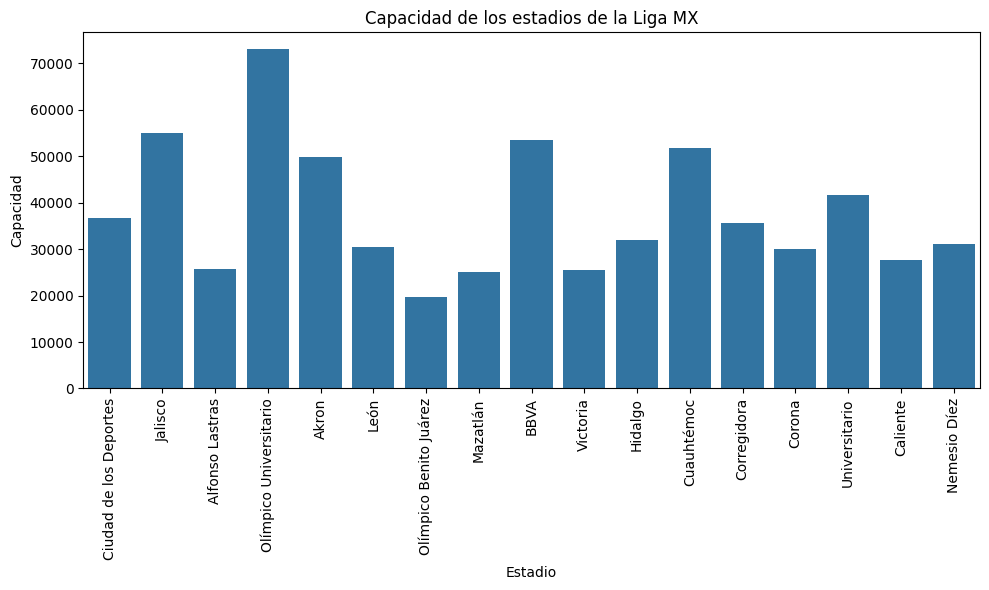

In [203]:
# Grafico de Barras

plt.figure(figsize=(10, 6))
sns.barplot(x='Estadio', y='Capacidad', data=df)
plt.title('Capacidad de los estadios de la Liga MX')
plt.xlabel('Estadio')
plt.ylabel('Capacidad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [207]:
# 10 equipos con mas titulos

tablas[4]

,Club,Títulos,Subtítulos,Años de los campeonatos,Años subcampeón
0,C. F. América,16,11,"1965-66, 1970-71, 1975-76, 1983-84, 1984-85, P...","1959-60, 1961-62, 1963-64, 1966-67, 1971-72, 1..."
1,C. D. Guadalajara,12,10,"1956-57, 1958-59, 1959-60, 1960-61, 1961-62, 1...","1951-52, 1954-55, 1962-63, 1968-69, M-1970, 19..."
2,Deportivo Toluca F. C.,11,8,"1966-67, 1967-68, 1974-75, V-1998, V-1999, V-2...","1956-57, 1957-58, 1970-71, I-2000, A-2006, A-2..."
3,C. D. Cruz Azul,9,12,"1968-69, M-1970, 1971-72, 1972-73, 1973-74, 19...","1969-70, 1980-81, 1986-87, 1988-89, 1994-95, I..."
4,Club León,8,7,"1947-48, 1948-49, 1951-52, 1955-56, 1991-92, A...","1946-47, 1958-59, 1972-73, 1974-75, I-1997, C-..."
5,C. F. Tigres UANL,8,6,"1977-78, 1981-82, A-2011, A-2015, A-2016, A-20...","1979-80, I-2001, A-2003, A-2014, C-2017 y A-2023"
6,Universidad Nacional,7,8,"1976-77, 1980-81, 1990-91, C-2004, A-2004, C-2...","1967-68, 1977-78, 1978-79, 1984-85, 1987-88, A..."
7,C. F. Pachuca,7,4,"I-1999, I-2001, A-2003, C-2006, C-2007, C-2016...","V-2001, C-2009, C-2014 y C-2022"
8,Santos Laguna,6,6,"I-1996, V-2001, C-2008, C-2012, C-2015 y C-2018","1993-94, V-2000, B-2010, A-2010, A-2011 y G-2021"
9,C. F. Monterrey,5,7,"M-1986, C-2003, A-2009, A-2010 y A-2019","1992-93, A-2004, A-2005, C-2012, C-2016, A-201..."


In [208]:
tablas[4].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Club                     31 non-null     object
 1   Títulos                  31 non-null     object
 2   Subtítulos               31 non-null     object
 3   Años de los campeonatos  24 non-null     object
 4   Años subcampeón          26 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [211]:
df1=tablas[4][['Club', 'Títulos']]
df1

,Club,Títulos
0,C. F. América,16
1,C. D. Guadalajara,12
2,Deportivo Toluca F. C.,11
3,C. D. Cruz Azul,9
4,Club León,8
5,C. F. Tigres UANL,8
6,Universidad Nacional,7
7,C. F. Pachuca,7
8,Santos Laguna,6
9,C. F. Monterrey,5


In [212]:
set(df1['Títulos'])

{'-', '1', '11', '12', '16', '2', '3', '5', '6', '7', '8', '9'}

In [215]:
df1['Títulos'].str.replace('-', '', regex=False)

,Títulos
0,16
1,12
2,11
3,9
4,8
5,8
6,7
7,7
8,6
9,5


In [218]:
# Poner cero en donde no hay valores

df1['Títulos'] = df1['Títulos'].str.replace('-', '0', regex=False)
df1

,Club,Títulos
0,C. F. América,16
1,C. D. Guadalajara,12
2,Deportivo Toluca F. C.,11
3,C. D. Cruz Azul,9
4,Club León,8
5,C. F. Tigres UANL,8
6,Universidad Nacional,7
7,C. F. Pachuca,7
8,Santos Laguna,6
9,C. F. Monterrey,5


In [220]:
df1['Títulos'] = df1['Títulos'].astype(int)

In [221]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Club     31 non-null     object
 1   Títulos  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 628.0+ bytes


In [222]:
df1.sort_values(by='Títulos' , ascending=False).head(10)

,Club,Títulos
0,C. F. América,16
1,C. D. Guadalajara,12
2,Deportivo Toluca F. C.,11
3,C. D. Cruz Azul,9
4,Club León,8
5,C. F. Tigres UANL,8
6,Universidad Nacional,7
7,C. F. Pachuca,7
8,Santos Laguna,6
9,C. F. Monterrey,5


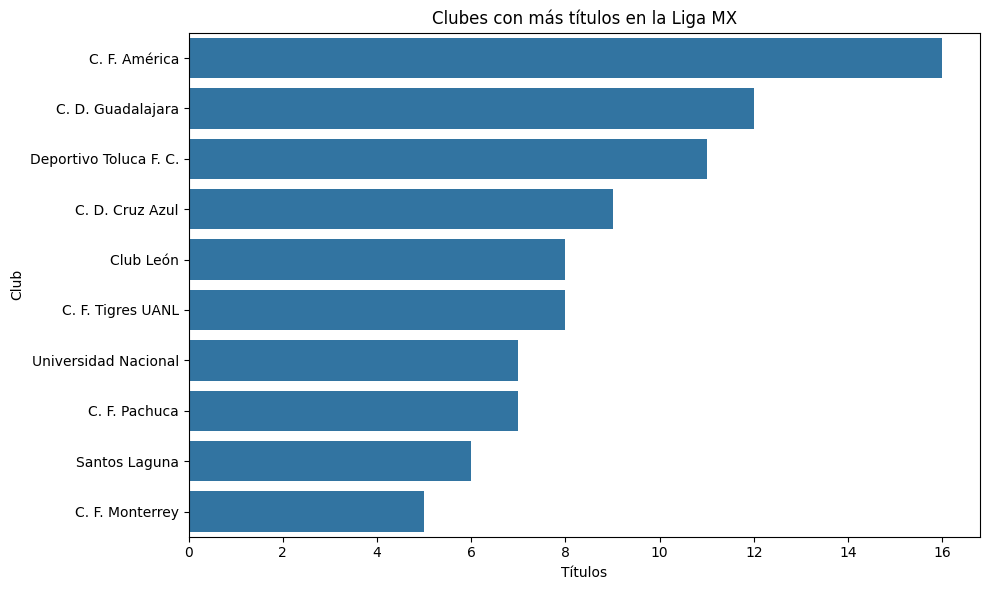

In [223]:
# Grafico Horizontal de Club contra Títulos

plt.figure(figsize=(10, 6))
sns.barplot(x='Títulos', y='Club', data=df1.sort_values(by='Títulos', ascending=False).head(10), orient='h')
plt.title('Clubes con más títulos en la Liga MX')
plt.xlabel('Títulos')
plt.ylabel('Club')
plt.tight_layout()
plt.show()

In [231]:
# Directores con mas titulos

tablas[11]

,N.º,Entrenador,Títulos,Periodo,Equipos,Campeonatos
0,1,Ignacio Trelles,7,1951 - 1991,"Marte (1), Zacatepec (2), Deportivo Toluca (2)...","1953-54, 1954-55, 1957-58, 1966-67, 1967-68, 1..."
1,1,Ricardo Ferretti,7,1991 -,"Guadalajara (1), UNAM (1), Tigres UANL (5)","V1997, C2009, A2011, A2015, A2016, A2017, C2019"
2,3,Raúl Cárdenas,6,1966 - 1998,"Cruz Azul (5), América (1)","1968-69, México 1970, 1971-72, 1972-73, 1973-7..."
3,4,Javier de la Torre,5,1955 - 1984,Guadalajara (5),"1960-61, 1961-62, 1963-64, 1964-65, 1969-70"
4,4,Manuel Lapuente,5,1978 - 2013,"Puebla (2), Necaxa (2), América (1)","1982-83, 1989-90, 1994-95, 1995-96, V2002"
5,4,Víctor Manuel Vucetich,5,1990 -,"León (1), Tecos (1), Pachuca (1), Monterrey (2)","1991-92, 1993-94, A2003, A2009, A2010"
6,7,Enrique Meza,4,1982 -,"Toluca (3), Pachuca (1)","V1998, V1999, V2000, C2007"
7,7,Antonio Mohamed,4,2004 -,"Tijuana (1), América (1), Monterrey (1), Toluc...","A2012, A2014, A2019, C2025"
8,8,Árpád Fekete,3,1957 - 1990,"Guadalajara (2), Club Oro (1)","1958-59, 1959-60, 1962-63"
9,8,José Manuel de la Torre,3,2006 -,"Guadalajara (1), Toluca (2)","A2006, A2008, Bicentenario 2010"


In [232]:
tablas[11].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   N.º          11 non-null     int64 
 1   Entrenador   11 non-null     object
 2   Títulos      11 non-null     int64 
 3   Periodo      11 non-null     object
 4   Equipos      11 non-null     object
 5   Campeonatos  11 non-null     object
dtypes: int64(2), object(4)
memory usage: 660.0+ bytes


In [234]:
df2=tablas[11][['Entrenador', 'Títulos']]
df2


,Entrenador,Títulos
0,Ignacio Trelles,7
1,Ricardo Ferretti,7
2,Raúl Cárdenas,6
3,Javier de la Torre,5
4,Manuel Lapuente,5
5,Víctor Manuel Vucetich,5
6,Enrique Meza,4
7,Antonio Mohamed,4
8,Árpád Fekete,3
9,José Manuel de la Torre,3


In [236]:
df2.sort_values(by='Títulos', ascending=True)

,Entrenador,Títulos
9,José Manuel de la Torre,3
10,André Jardine,3
8,Árpád Fekete,3
6,Enrique Meza,4
7,Antonio Mohamed,4
4,Manuel Lapuente,5
3,Javier de la Torre,5
5,Víctor Manuel Vucetich,5
2,Raúl Cárdenas,6
0,Ignacio Trelles,7


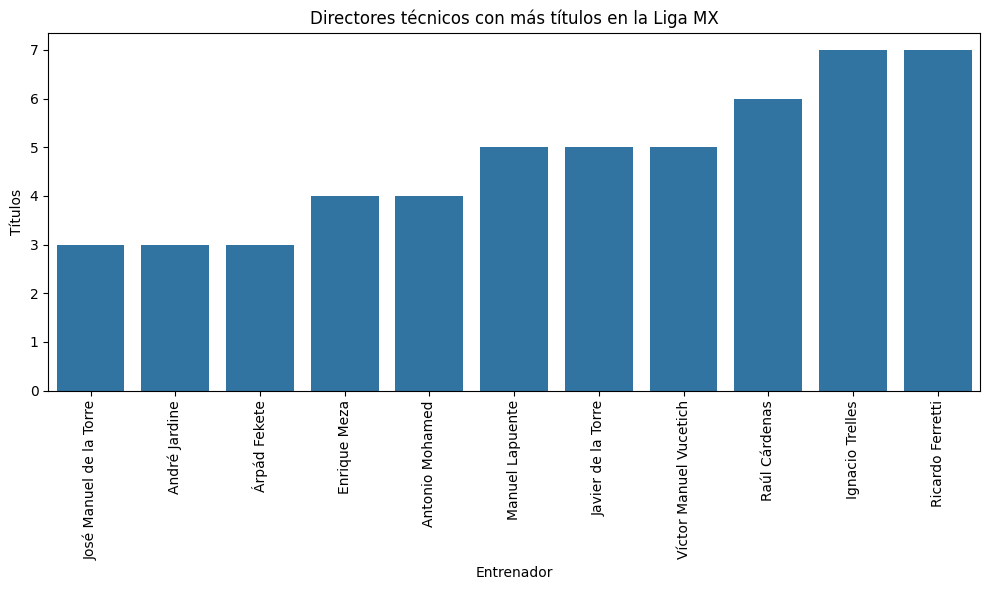

In [237]:
# Grafico de Entrenador contra titulos

plt.figure(figsize=(10, 6))
sns.barplot(x='Entrenador', y='Títulos', data=df2.sort_values(by='Títulos', ascending=True))
plt.title('Directores técnicos con más títulos en la Liga MX')
plt.xlabel('Entrenador')
plt.ylabel('Títulos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [241]:
# Entrenador que conquisto con titulo de guadalajara

df3=tablas[11][['Entrenador', 'Títulos', 'Equipos']]
df3

,Entrenador,Títulos,Equipos
0,Ignacio Trelles,7,"Marte (1), Zacatepec (2), Deportivo Toluca (2)..."
1,Ricardo Ferretti,7,"Guadalajara (1), UNAM (1), Tigres UANL (5)"
2,Raúl Cárdenas,6,"Cruz Azul (5), América (1)"
3,Javier de la Torre,5,Guadalajara (5)
4,Manuel Lapuente,5,"Puebla (2), Necaxa (2), América (1)"
5,Víctor Manuel Vucetich,5,"León (1), Tecos (1), Pachuca (1), Monterrey (2)"
6,Enrique Meza,4,"Toluca (3), Pachuca (1)"
7,Antonio Mohamed,4,"Tijuana (1), América (1), Monterrey (1), Toluc..."
8,Árpád Fekete,3,"Guadalajara (2), Club Oro (1)"
9,José Manuel de la Torre,3,"Guadalajara (1), Toluca (2)"


In [242]:
# Entrenadores con titulos de Guadalajara

df3[df3['Equipos'].str.contains('Guadalajara')]

,Entrenador,Títulos,Equipos
1,Ricardo Ferretti,7,"Guadalajara (1), UNAM (1), Tigres UANL (5)"
3,Javier de la Torre,5,Guadalajara (5)
8,Árpád Fekete,3,"Guadalajara (2), Club Oro (1)"
9,José Manuel de la Torre,3,"Guadalajara (1), Toluca (2)"


In [244]:
# Numero de titulos de cada entrenador de guadalajara

df3[df3['Equipos'].str.contains('Guadalajara')].groupby('Entrenador')['Títulos'].sum()

,Títulos
Entrenador,
Javier de la Torre,5
José Manuel de la Torre,3
Ricardo Ferretti,7
Árpád Fekete,3


In [245]:
# Entrenador que conquisto con titulo de america

df3[df3['Equipos'].str.contains('América')]

,Entrenador,Títulos,Equipos
2,Raúl Cárdenas,6,"Cruz Azul (5), América (1)"
4,Manuel Lapuente,5,"Puebla (2), Necaxa (2), América (1)"
7,Antonio Mohamed,4,"Tijuana (1), América (1), Monterrey (1), Toluc..."
10,André Jardine,3,América (3)


In [246]:
# Numero de titulos de cada entrenador de america

df3[df3['Equipos'].str.contains('América')].groupby('Entrenador')['Títulos'].sum()

,Títulos
Entrenador,
André Jardine,3
Antonio Mohamed,4
Manuel Lapuente,5
Raúl Cárdenas,6


**Ejercicio 3.** Cargue los datos de los ingresos de la Ciudad de México en el año 2021 (ingresos_CDMX_2021.csv en GitHub) y realice lo siguiente:

* Elimine la cadena "desc_" en cada columna que la contenga.

* Limpie las cadenas de caracteres contenidas en las columnas (esto es, elimine caracteres como Û, ¢, °, Ì, etc.)

* La única variable numérica debe ser la variable "monto_recaudado".

* Obtenga un Dataframe que describa el monto recaudado en cada rubro. Obtenga una gráfica que ilustre esto.

* Obtenga un Dataframe que describa el monto recaudado en cada rubro y el tipo de rubro.

* Obtenga un Dataframe que describa el monto recaudado en cada trimestre. Obtenga una gráfica que ilustre esto.

* Obtenga un Dataframe que describa el monto recaudado en cada rubro en los tres trimestres. Obtenga una gráfica que ilustre esto.

* Coloque en orden alfabético el Dataframe anterior de acuerdo al rubro (1er índice).

* ¿Cuál fue el monto total recaudado por la CDMX en 2021?

* ¿De cuánto fue el endeudamiento interno?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/ingresos_CDMX_2021.csv'
df=pd.read_csv(ruta)
df.head()

,ciclo,periodo,desc_tipo_recurso_clase,desc_rubro,desc_tipo,desc_clase,desc_concepto,desc_concepto_esp,monto_recaudado
0,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Predial,NaN,NaN,1.247781e+10
1,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Sobre Adquisici¢n de Inmuebles,NaN,NaN,1.794347e+09
2,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Sobre Tenencia o Uso de Veh°culos,NaN,NaN,3.427249e+09
3,2021,Primer Trimestre,Ingresos locales,Impuestos,"Impuestos sobre la producci¢n, el consumo y la...",Sobre Espect†culos P£blicos,NaN,NaN,6.500144e+07
4,2021,Primer Trimestre,Ingresos locales,Impuestos,"Impuestos sobre la producci¢n, el consumo y la...","Sobre Loter°as, Rifas, Sorteos y Concursos",NaN,NaN,6.819808e+07


In [ ]:
# Eliminacion de  "desc_"
df.columns = df.columns.str.replace('desc_', '', regex=False)
df.head()

,ciclo,periodo,tipo_recurso_clase,rubro,tipo,clase,concepto,concepto_esp,monto_recaudado
0,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Predial,nan,nan,1.247781e+10
1,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Sobre Adquisicin de Inmuebles,nan,nan,1.794347e+09
2,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Sobre Tenencia o Uso de Vehculos,nan,nan,3.427249e+09
3,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre la produccin el consumo y las ...,Sobre Espectculos Pblicos,nan,nan,6.500144e+07
4,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre la produccin el consumo y las ...,Sobre Loteras Rifas Sorteos y Concursos,nan,nan,6.819808e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ciclo               240 non-null    object 
 1   periodo             240 non-null    object 
 2   tipo_recurso_clase  240 non-null    object 
 3   rubro               240 non-null    object 
 4   tipo                240 non-null    object 
 5   clase               240 non-null    object 
 6   concepto            240 non-null    object 
 7   concepto_esp        240 non-null    object 
 8   monto_recaudado     240 non-null    float64
dtypes: float64(1), object(8)
memory usage: 17.0+ KB


In [ ]:
# Limpieza de las cadenas de caracteres

import re

def clean_string(text):
    if isinstance(text, str):
        # Remove special characters, keep letters, numbers, and spaces
        return re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

string_columns = df.select_dtypes(include=['object']).columns
for col in string_columns:
    df[col] = df[col].apply(clean_string)

df.head()

,ciclo,periodo,tipo_recurso_clase,rubro,tipo,clase,concepto,concepto_esp,monto_recaudado
0,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Predial,nan,nan,1.247781e+10
1,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Sobre Adquisicin de Inmuebles,nan,nan,1.794347e+09
2,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Sobre Tenencia o Uso de Vehculos,nan,nan,3.427249e+09
3,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre la produccin el consumo y las ...,Sobre Espectculos Pblicos,nan,nan,6.500144e+07
4,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre la produccin el consumo y las ...,Sobre Loteras Rifas Sorteos y Concursos,nan,nan,6.819808e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ciclo               240 non-null    object 
 1   periodo             240 non-null    object 
 2   tipo_recurso_clase  240 non-null    object 
 3   rubro               240 non-null    object 
 4   tipo                240 non-null    object 
 5   clase               240 non-null    object 
 6   concepto            240 non-null    object 
 7   concepto_esp        240 non-null    object 
 8   monto_recaudado     240 non-null    float64
dtypes: float64(1), object(8)
memory usage: 17.0+ KB


In [ ]:
# Variable "monto_recaudado"
df['monto_recaudado'] = pd.to_numeric(df['monto_recaudado'], errors='coerce')

for col in df.columns:
    if col != 'monto_recaudado':
        df[col] = df[col].astype(str)

df.head()

,ciclo,periodo,tipo_recurso_clase,rubro,tipo,clase,concepto,concepto_esp,monto_recaudado
0,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Predial,nan,nan,1.247781e+10
1,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Sobre Adquisicin de Inmuebles,nan,nan,1.794347e+09
2,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Sobre Tenencia o Uso de Vehculos,nan,nan,3.427249e+09
3,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre la produccin el consumo y las ...,Sobre Espectculos Pblicos,nan,nan,6.500144e+07
4,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre la produccin el consumo y las ...,Sobre Loteras Rifas Sorteos y Concursos,nan,nan,6.819808e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ciclo               240 non-null    object 
 1   periodo             240 non-null    object 
 2   tipo_recurso_clase  240 non-null    object 
 3   rubro               240 non-null    object 
 4   tipo                240 non-null    object 
 5   clase               240 non-null    object 
 6   concepto            240 non-null    object 
 7   concepto_esp        240 non-null    object 
 8   monto_recaudado     240 non-null    float64
dtypes: float64(1), object(8)
memory usage: 17.0+ KB


In [ ]:
# DataFrame del rubro recaudado

df_rubro = df.groupby('rubro')['monto_recaudado'].sum().reset_index()
df_rubro

,rubro,monto_recaudado
0,Aprovechamientos,1.137791e+10
1,Cuotas y Aportaciones de Seguridad Social,6.485683e+09
2,Derechos,2.064104e+10
3,Impuestos,1.110418e+11
4,Ingresos Derivados de Financiamientos,-4.913614e+09
5,Ingresos por Venta de Bienes Prestacin de Serv...,2.010867e+10
6,Participaciones Aportaciones Convenios Incenti...,1.859880e+11
7,Productos,1.671486e+10


/tmp/ipython-input-19-37100850.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


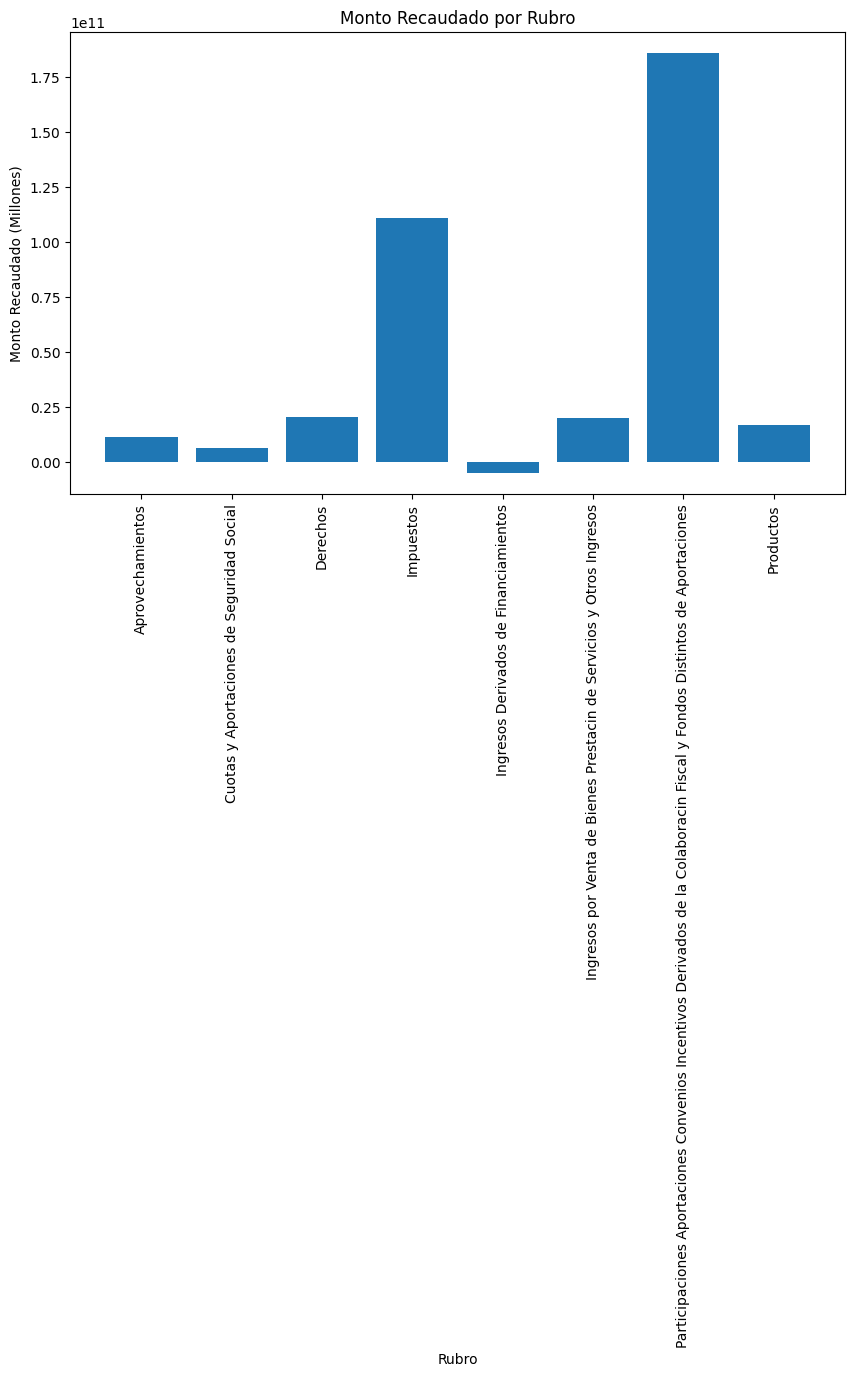

In [ ]:
# Graficas del rubro

plt.figure(figsize=(10, 6))
plt.bar(df_rubro['rubro'], df_rubro['monto_recaudado'])
plt.xlabel('Rubro')
plt.ylabel('Monto Recaudado (Millones)')
plt.title('Monto Recaudado por Rubro')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# DataFrame de la recaudacion por rubro

df_rubro_tipo = df.groupby(['rubro', 'tipo'])['monto_recaudado'].sum().reset_index()
df_rubro_tipo

,rubro,tipo,monto_recaudado
0,Aprovechamientos,Aprovechamientos,1.137791e+10
1,Cuotas y Aportaciones de Seguridad Social,Otras Cuotas y Aportaciones para la Seguridad ...,6.485683e+09
2,Derechos,Accesorios de los Derechos,2.971185e+08
3,Derechos,Derechos por el uso goce aprovechamiento o exp...,7.601900e+08
4,Derechos,Derechos por prestacin de servicios,1.915533e+10
5,Derechos,Otros Derechos,4.284067e+08
6,Impuestos,Accesorios de los Impuestos,7.670941e+08
7,Impuestos,Impuestos sobre Nminas y Asimilables,4.300951e+10
8,Impuestos,Impuestos sobre el patrimonio,6.589643e+10
9,Impuestos,Impuestos sobre la produccin el consumo y las ...,1.368769e+09


In [ ]:
# DataFrame del monto recaudado en cada trimestre

df_trimestre = df.groupby('trimestre')['monto_recaudado'].sum().reset_index()
df_trimestre

,trimestre,monto_recaudado
0,1,6.590649e+10
1,2,1.238842e+11
2,3,1.776536e+11


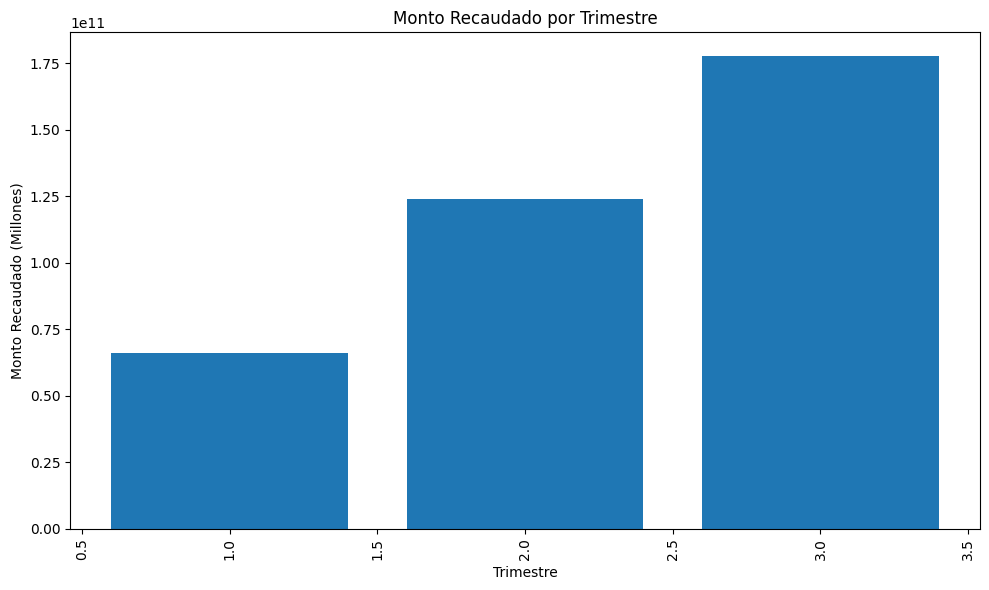

In [ ]:
# Grafica del monto recaudado por trimestre

plt.figure(figsize=(10, 6))
plt.bar(df_trimestre['trimestre'], df_trimestre['monto_recaudado'])
plt.xlabel('Trimestre')
plt.ylabel('Monto Recaudado (Millones)')
plt.title('Monto Recaudado por Trimestre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# DataFrame de monto recaudado en los tres trimestres de cada rubro

df_rubro_trimestre = df.groupby(['rubro', 'trimestre'])['monto_recaudado'].sum().reset_index()
df_rubro_trimestre


,rubro,trimestre,monto_recaudado
0,Aprovechamientos,1,1.105178e+09
1,Aprovechamientos,2,4.123707e+09
2,Aprovechamientos,3,6.149027e+09
3,Cuotas y Aportaciones de Seguridad Social,1,1.018019e+09
4,Cuotas y Aportaciones de Seguridad Social,2,2.103876e+09
5,Cuotas y Aportaciones de Seguridad Social,3,3.363788e+09
6,Derechos,1,4.174313e+09
7,Derechos,2,6.640586e+09
8,Derechos,3,9.826144e+09
9,Impuestos,1,2.565807e+10


/tmp/ipython-input-29-278922564.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


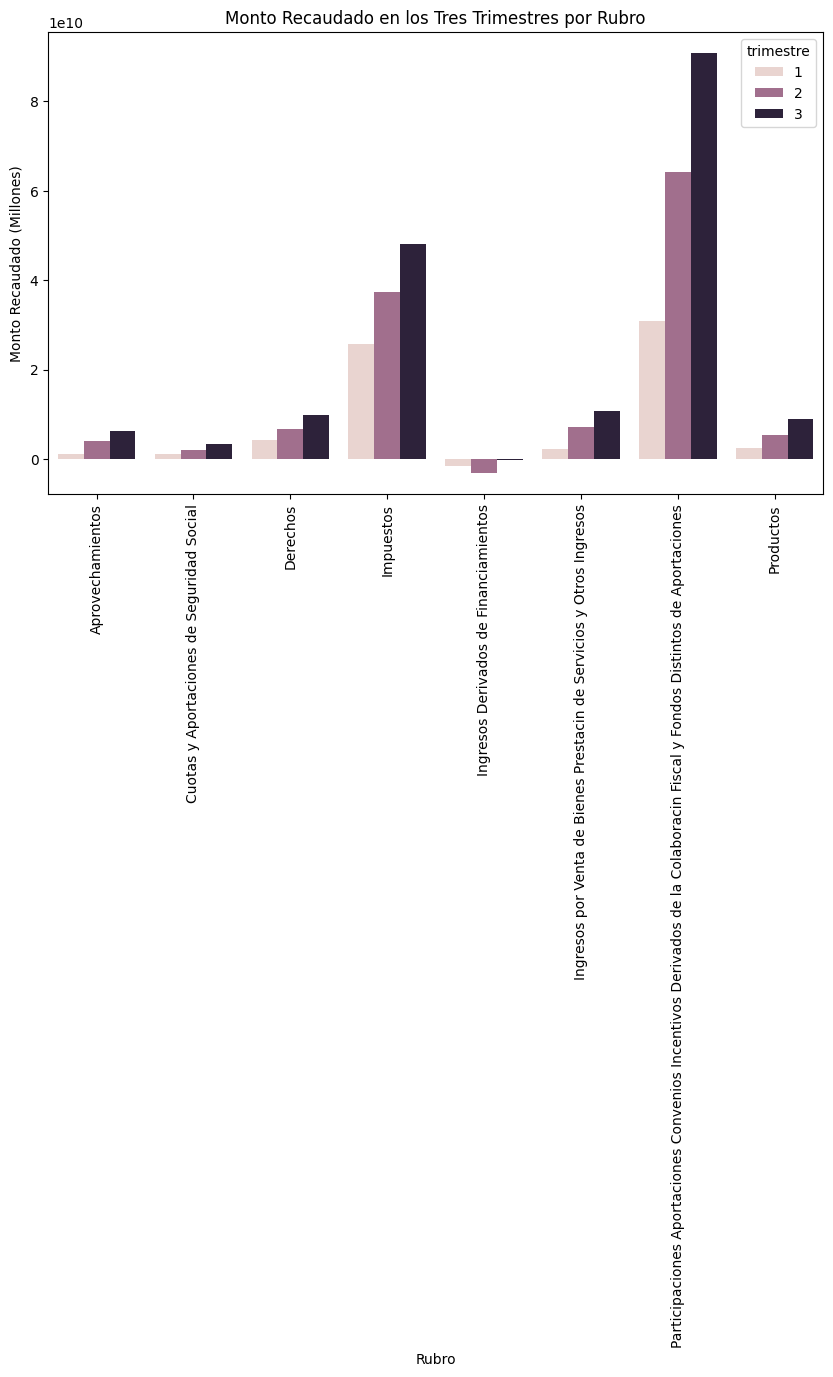

In [ ]:
# Grafica de la recaudacion en los tres trimestres de cada rubro

plt.figure(figsize=(10, 6))
sns.barplot(x='rubro', y='monto_recaudado', hue='trimestre', data=df_rubro_trimestre)
plt.xlabel('Rubro')
plt.ylabel('Monto Recaudado (Millones)')
plt.title('Monto Recaudado en los Tres Trimestres por Rubro')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# colocar en orden alfabetico el DataFrame anterior

df_rubro_trimestre_sorted = df_rubro_trimestre.sort_values(by='rubro')
df_rubro_trimestre_sorted

,rubro,trimestre,monto_recaudado
0,Aprovechamientos,1,1.105178e+09
1,Aprovechamientos,2,4.123707e+09
2,Aprovechamientos,3,6.149027e+09
3,Cuotas y Aportaciones de Seguridad Social,1,1.018019e+09
4,Cuotas y Aportaciones de Seguridad Social,2,2.103876e+09
5,Cuotas y Aportaciones de Seguridad Social,3,3.363788e+09
6,Derechos,1,4.174313e+09
7,Derechos,2,6.640586e+09
8,Derechos,3,9.826144e+09
10,Impuestos,2,3.731351e+10


In [ ]:
# Monto recaudado por la CDMX en 2021

monto_total_recaudado = df['monto_recaudado'].sum()
print("Monto total recaudado por la CDMX en 2021:", monto_total_recaudado)

Monto total recaudado por la CDMX en 2021: 367444318880.54


In [ ]:
# Endeudamiento interno

df_endeudamiento = df.groupby('tipo')['monto_recaudado'].sum().reset_index()
df_endeudamiento

,tipo,monto_recaudado
0,Accesorios de los Derechos,2.971185e+08
1,Accesorios de los Impuestos,7.670941e+08
2,Aportaciones,2.585169e+10
3,Aprovechamientos,1.137791e+10
4,Convenios,1.160446e+10
5,Derechos por el uso goce aprovechamiento o exp...,7.601900e+08
6,Derechos por prestacin de servicios,1.915533e+10
7,Endeudamiento interno,-4.913614e+09
8,Fondos Distintos de Aportaciones,2.877234e+09
9,Impuestos sobre Nminas y Asimilables,4.300951e+10


**Ejercicio 4.** Una empresa realiza entrevistas a 20 candidatos para un puesto. De esos 20 candidatos, 14 son mujeres y 6 son hombres.

Al final del proceso, se seleccionan 8 personas, de las cuales 7 son mujeres.

Un analista externo se pregunta si el proceso de selección favoreció a las mujeres. Instrucciones:

* Plantea una prueba de hipótesis para evaluar si hubo favoritismo hacia las mujeres.
  * Define la hipótesis nula: la selección fue aleatoria (sin favoritismo).
  * Define la hipótesis alternativa: hay favoritismo hacia las mujeres.
* Simula mediante Monte Carlo el proceso de seleccionar 8 personas al azar de los 20 candidatos, repitiendo esto al menos 100,000 veces.

* Calcula el p-valor como la proporción de simulaciones en las que 7 o más mujeres fueron seleccionadas.

* Concluye si hay evidencia suficiente para pensar que el proceso favoreció a las mujeres. Usa un nivel de significancia de 5 %.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Definimos las hipotesis a refutar:
+ **H_0**: p=0.7
+ **H_a**: p>0.7

In [ ]:
# Simulaciones por Monte Carlo de el proceso de seleccionar 8 mujeres al azar de los 20 candidatos

n_simulaciones = 100000
n_candidatos = 20
n_mujeres = 14
n_hombres=6
seleccion_mujeres = 7

# Creacion de candidatos "1" si es mujer o "0" si es hombre

candidatos = np.random.choice([1, 0], size=n_candidatos, p=[0.7, 0.3])

# Simulacion de Monte Carlo

mujeres_seleccionadas=[]


for i in range(n_simulaciones):
    seleccion = np.random.choice(candidatos, size=seleccion_mujeres, replace=False)
    contador_mujeres=np.sum(seleccion)
    mujeres_seleccionadas.append(contador_mujeres)

mujeres_seleccionadas=np.array(mujeres_seleccionadas)

mujeres_seleccionadas



array([6, 6, 5, ..., 5, 6, 6])

In [ ]:
# Calculo de el p-valor como la proporción de simulaciones en las que 7 o más mujeres fueron seleccionadas.

p_valor = np.mean(mujeres_seleccionadas >= 7)
p_valor

np.float64(0.25072)

In [ ]:
# Resultados de la prueba de hipotesis

print(f"Numero de simulaciones: {n_simulaciones}")
print(f"Numero de candidatos: {n_candidatos}")
print(f"Numero de mujeres: {n_mujeres}")
print(f"Numero de hombres: {n_hombres}")
print(f"Numero de mujeres seleccionadas: {seleccion_mujeres}")
print(f"P-valor: {p_valor}")

if p_valor < 0.05:
    print("Se rechaza la hipótesis nula. Hay evidencia suficiente para pensar que el proceso favoreció a las mujeres.")
else:
    print(f"Se acepta la hipotesis nula. No hay evidencia que diga que esto favorecio a las mujeres")





Numero de simulaciones: 100000
Numero de candidatos: 20
Numero de mujeres: 14
Numero de hombres: 6
Numero de mujeres seleccionadas: 7
P-valor: 0.25072
Se acepta la hipotesis nula. No hay evidencia que diga que esto favorecio a las mujeres


/tmp/ipython-input-45-1242431925.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


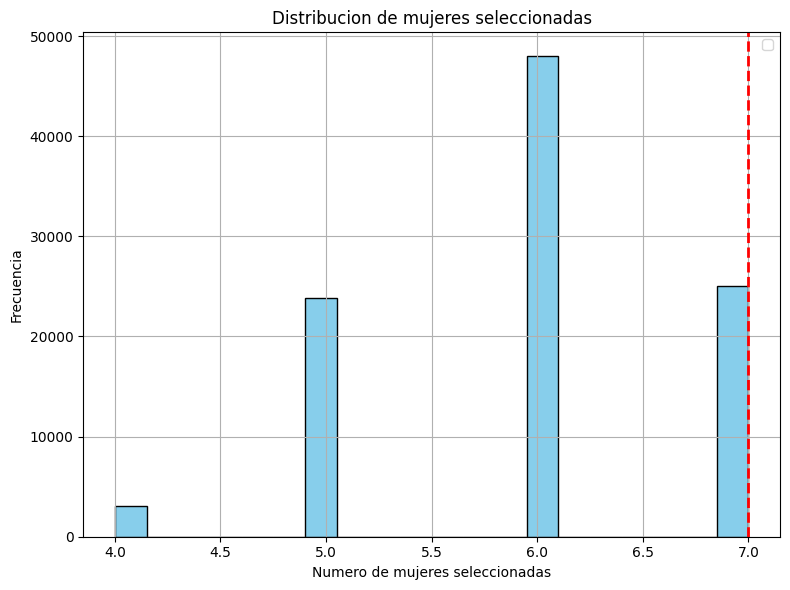

In [ ]:
# Grafica de visualizacion

plt.figure(figsize=(8, 6))
plt.hist(mujeres_seleccionadas, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=7, color='red', linestyle='--', linewidth=2)
plt.xlabel('Numero de mujeres seleccionadas')
plt.ylabel('Frecuencia')
plt.title('Distribucion de mujeres seleccionadas')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

**Ejercicio 5.** Cargue en un objeto 'defunciones' las columnas 'edad', 'sexo','estado' y 'alcaldia' de los datos de las actas de defunción de la Ciudad de México (defunciones_CDMX.csv en GitHub) y realice lo siguiente:

* Agrupe en edades de 10 años: (0, 10], (10, 20], ... y calcule la frecuencia de defunciones en estos grupos (usar pandas.cut).

* Añada a defunciones una columna con el grupo etario de cada persona:

Niñez (de 0 a 11 años)

Adolescencia (de 12 a 18 años)

Juventud (de 19 a 30 años)

Adultez (de 31 a 59 años)

Vejez (de 60 años en adelante)

* Obtenga un Dataframe que contenga la cantidad de defunciones por grupo etario e ilustre con una gráfica.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargamos los datos

ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/defunciones_CDMX.csv'
defunciones=pd.read_csv(ruta,usecols=['edad','sexo','estado','alcaldia'])
defunciones

,edad,sexo,estado,alcaldia
0,73.0,Hombre,CIUDAD DE MEXICO,VENUSTIANO CARRANZA
1,88.0,Hombre,CIUDAD DE MEXICO,IZTAPALAPA
2,55.0,Hombre,CIUDAD DE MEXICO,IZTAPALAPA
3,81.0,Mujer,CIUDAD DE MEXICO,BENITO JUAREZ
4,87.0,Hombre,CIUDAD DE MEXICO,IZTACALCO
...,...,...,...,...
29995,108.0,Mujer,CIUDAD DE MEXICO,NaN
29996,55.0,Hombre,ESTADO DE MEXICO,NaN
29997,75.0,Mujer,CIUDAD DE MEXICO,IZTACALCO
29998,62.0,Mujer,CIUDAD DE MEXICO,COYOACAN


In [ ]:
defunciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   edad      29985 non-null  float64
 1   sexo      30000 non-null  object 
 2   estado    29543 non-null  object 
 3   alcaldia  17642 non-null  object 
dtypes: float64(1), object(3)
memory usage: 937.6+ KB


In [ ]:
# Creacion de grupos de edades

bins=range(0, 121, 10)
labels=[f'({i}, {i+10}]' for i in range(0, 120, 10)]
defunciones['grupo_edad_10'] = pd.cut(defunciones['edad'], bins=bins, labels=labels, include_lowest=True)
defunciones

,edad,sexo,estado,alcaldia,grupo_edad_10
0,73.0,Hombre,CIUDAD DE MEXICO,VENUSTIANO CARRANZA,"(70, 80]"
1,88.0,Hombre,CIUDAD DE MEXICO,IZTAPALAPA,"(80, 90]"
2,55.0,Hombre,CIUDAD DE MEXICO,IZTAPALAPA,"(50, 60]"
3,81.0,Mujer,CIUDAD DE MEXICO,BENITO JUAREZ,"(80, 90]"
4,87.0,Hombre,CIUDAD DE MEXICO,IZTACALCO,"(80, 90]"
...,...,...,...,...,...
29995,108.0,Mujer,CIUDAD DE MEXICO,NaN,"(100, 110]"
29996,55.0,Hombre,ESTADO DE MEXICO,NaN,"(50, 60]"
29997,75.0,Mujer,CIUDAD DE MEXICO,IZTACALCO,"(70, 80]"
29998,62.0,Mujer,CIUDAD DE MEXICO,COYOACAN,"(60, 70]"


In [ ]:
# Frecuencia de defunciones por grupo de edad

frecuencia_por_grupo = defunciones['grupo_edad_10'].value_counts().sort_index()
frecuencia_por_grupo

,count
grupo_edad_10,
"(0, 10]",991
"(10, 20]",421
"(20, 30]",904
"(30, 40]",1331
"(40, 50]",2347
"(50, 60]",3979
"(60, 70]",5684
"(70, 80]",6148
"(80, 90]",5762


In [ ]:
# Funcion para grupo etario


def asignar_grupo_etario(edad):
    if 0 <= edad <= 11:
        return 'Niñez'
    elif 12 <= edad <= 18:
        return 'Adolescencia'
    elif 19 <= edad <= 30:
        return 'Juventud'
    elif 31 <= edad <= 59:
        return 'Adultez'
    else:
        return 'Vejez'

# Añadir la columna

defunciones['grupo_etario'] = defunciones['edad'].apply(asignar_grupo_etario)
display(defunciones.head())

,edad,sexo,estado,alcaldia,grupo_edad_10,grupo_etario
0,73.0,Hombre,CIUDAD DE MEXICO,VENUSTIANO CARRANZA,"(70, 80]",Vejez
1,88.0,Hombre,CIUDAD DE MEXICO,IZTAPALAPA,"(80, 90]",Vejez
2,55.0,Hombre,CIUDAD DE MEXICO,IZTAPALAPA,"(50, 60]",Adultez
3,81.0,Mujer,CIUDAD DE MEXICO,BENITO JUAREZ,"(80, 90]",Vejez
4,87.0,Hombre,CIUDAD DE MEXICO,IZTACALCO,"(80, 90]",Vejez


In [ ]:
# DataFrame con cantidad de defunciones por grupo

df_grupo_etario = defunciones.groupby('grupo_etario').size().reset_index(name='cantidad')
df_grupo_etario

,grupo_etario,cantidad
0,Adolescencia,260
1,Adultez,7175
2,Juventud,1039
3,Niñez,1017
4,Vejez,20509


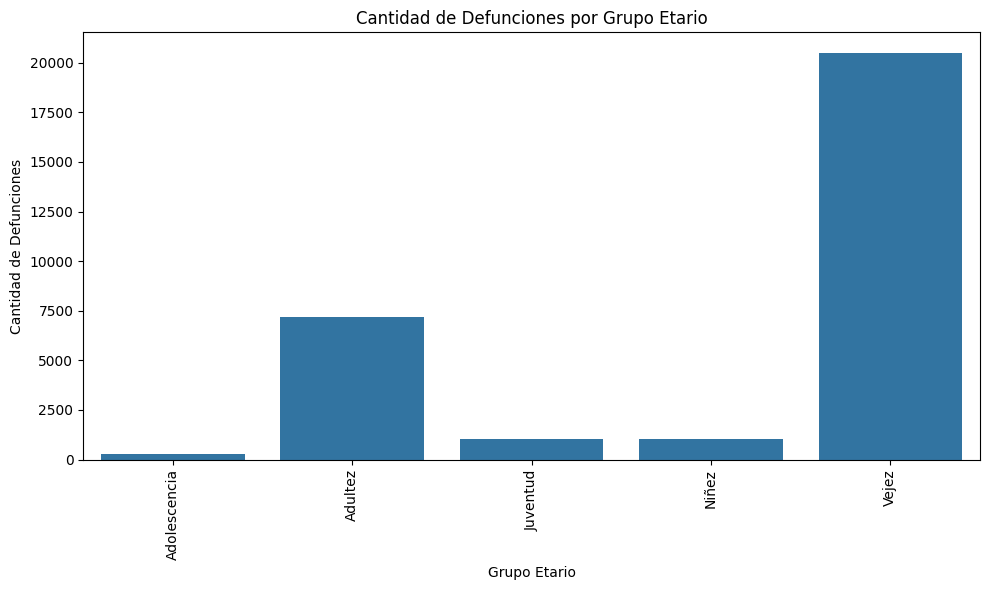

In [ ]:
# Grafica de barras para grupos etarios

plt.figure(figsize=(10, 6))
sns.barplot(x='grupo_etario', y='cantidad', data=df_grupo_etario)
plt.xlabel('Grupo Etario')
plt.ylabel('Cantidad de Defunciones')
plt.title('Cantidad de Defunciones por Grupo Etario')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Resultados

print("Frecuencia de defunciones por grupo de edad:")
print(frecuencia_por_grupo)

print("\nCantidad de defunciones por grupo etario:")
print(df_grupo_etario)

Frecuencia de defunciones por grupo de edad:
grupo_edad_10
(0, 10]        991
(10, 20]       421
(20, 30]       904
(30, 40]      1331
(40, 50]      2347
(50, 60]      3979
(60, 70]      5684
(70, 80]      6148
(80, 90]      5762
(90, 100]     2285
(100, 110]     133
(110, 120]       0
Name: count, dtype: int64

Cantidad de defunciones por grupo etario:
   grupo_etario  cantidad
0  Adolescencia       260
1       Adultez      7175
2      Juventud      1039
3         Niñez      1017
4         Vejez     20509


In [267]:
# Horario con mas delitos

df_hora_hecho = df.groupby('hora_hecho').size().reset_index(name='Frecuencia')
df_hora_hecho.sort_values(by='Frecuencia', ascending=False, inplace=True)
display(df_hora_hecho.head(5))

,hora_hecho,Frecuencia
1431,12:00:00,192234
1191,10:00:00,81609
1311,11:00:00,46664
1071,09:00:00,46116
1791,15:00:00,44576
